# Import required libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlp import MLP, ActivationFunction

# Prepare MNIST

In [2]:
# Load and preprocess the MNIST dataset
mnist = load_digits()
X_mnist, y_mnist = mnist.data, mnist.target

# Split the data into training and test sets
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Further split the training data into new training and validation sets
X_mnist_train, X_mnist_val, y_mnist_train, y_mnist_val = train_test_split(X_mnist_train, y_mnist_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_val = scaler.transform(X_mnist_val)
X_mnist_test = scaler.transform(X_mnist_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_mnist_train = encoder.fit_transform(y_mnist_train.reshape(-1, 1))
y_mnist_val = encoder.transform(y_mnist_val.reshape(-1, 1))
y_mnist_test = encoder.transform(y_mnist_test.reshape(-1, 1))

/Users/robertnasuti/.local/share/virtualenvs/MultiLayerPerceptron-cyc80dTD/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train custom neural network on MNIST using relu with tempered history

Learning Rate: 1e-06, Decay Factor: 0.9
    Max Training Accuracy: 0.1036
    Max Validation Accuracy: 0.1181
    Min Training Loss: 2.2935
    Min Validation Loss: 2.1947
------------------------------------------------
Learning Rate: 1e-06, Decay Factor: 0.95
    Max Training Accuracy: 0.1166
    Max Validation Accuracy: 0.0972
    Min Training Loss: 2.3218
    Min Validation Loss: 2.3489
------------------------------------------------
Learning Rate: 1e-06, Decay Factor: 0.99
    Max Training Accuracy: 0.0827
    Max Validation Accuracy: 0.0694
    Min Training Loss: 1.2514
    Min Validation Loss: 1.1737
------------------------------------------------
Learning Rate: 1e-05, Decay Factor: 0.9
    Max Training Accuracy: 0.0627
    Max Validation Accuracy: 0.0903
    Min Training Loss: 1.0082
    Min Validation Loss: 0.9656
------------------------------------------------
Learning Rate: 1e-05, Decay Factor: 0.95
    Max Training Accuracy: 0.1654
    Max Validation Accuracy: 0.1493
   

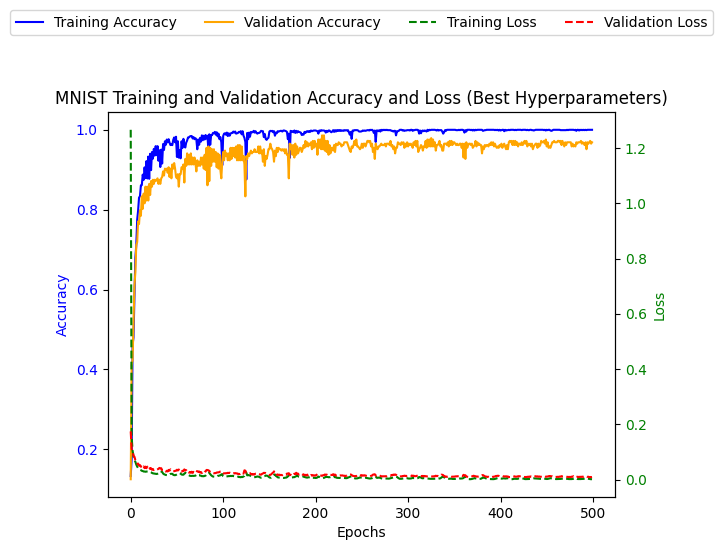

Best Learning Rate: 0.01
Best Decay Factor: 0.95


In [5]:
# Hyperparameters to search over
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
decay_factors = [0.9, 0.95, 0.99]

best_val_accuracy = 0  # Track the best validation accuracy
best_hyperparams = None  # Track the best combination of hyperparameters
best_results = None  # Track the best results for plotting

# Dictionary to store results
results_dict = {}

# Grid search over learning rate and decay factor
for lr in learning_rates:
    for decay_factor in decay_factors:
        # Initialize and train the MLP on MNIST
        mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=lr,
                        activation_function=ActivationFunction.RELU, use_momentum=False, use_history=True, beta=decay_factor)
        mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=500)

        # Store results in dictionary
        results_dict[(lr, decay_factor)] = {
            'max_train_accuracy': max(mnist_training_accuracies),
            'max_val_accuracy': max(mnist_validation_accuracies),
            'min_train_loss': min(mnist_training_losses),
            'min_val_loss': min(mnist_validation_losses)
        }

        # Check if this combination has better validation accuracy
        if max(mnist_validation_accuracies) > best_val_accuracy:
            best_val_accuracy = max(mnist_validation_accuracies)
            best_hyperparams = (lr, decay_factor)
            best_results = (mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses)

# Print results for all combinations
for (lr, decay_factor), metrics in results_dict.items():
    print(f"Learning Rate: {lr}, Decay Factor: {decay_factor}")
    print(f"    Max Training Accuracy: {metrics['max_train_accuracy']:.4f}")
    print(f"    Max Validation Accuracy: {metrics['max_val_accuracy']:.4f}")
    print(f"    Min Training Loss: {metrics['min_train_loss']:.4f}")
    print(f"    Min Validation Loss: {metrics['min_val_loss']:.4f}")
    print("------------------------------------------------")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Extract the best results for plotting
best_train_acc, best_val_acc, best_train_loss, best_val_loss = best_results

# Plot training and validation accuracy from the best run
ax1.plot(best_train_acc, label='Training Accuracy', color='blue')
ax1.plot(best_val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(best_train_loss, label='Training Loss', linestyle='--', color='green')
ax2.plot(best_val_loss, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss (Best Hyperparameters)')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Display the optimal hyperparameters
print(f"Best Learning Rate: {best_hyperparams[0]}")
print(f"Best Decay Factor: {best_hyperparams[1]}")

# Train custom neural network on MNIST using sigmoid with tempered history

Learning Rate: 1e-06, Decay Factor: 0.9
    Max Training Accuracy: 0.0940
    Max Validation Accuracy: 0.0660
    Min Training Loss: 0.8093
    Min Validation Loss: 0.8178
------------------------------------------------
Learning Rate: 1e-06, Decay Factor: 0.95
    Max Training Accuracy: 0.0644
    Max Validation Accuracy: 0.0521
    Min Training Loss: 0.8113
    Min Validation Loss: 0.8177
------------------------------------------------
Learning Rate: 1e-06, Decay Factor: 0.99
    Max Training Accuracy: 0.0844
    Max Validation Accuracy: 0.0903
    Min Training Loss: 0.8123
    Min Validation Loss: 0.8180
------------------------------------------------
Learning Rate: 1e-05, Decay Factor: 0.9
    Max Training Accuracy: 0.1097
    Max Validation Accuracy: 0.1007
    Min Training Loss: 0.8047
    Min Validation Loss: 0.8135
------------------------------------------------
Learning Rate: 1e-05, Decay Factor: 0.95
    Max Training Accuracy: 0.1044
    Max Validation Accuracy: 0.1042
   

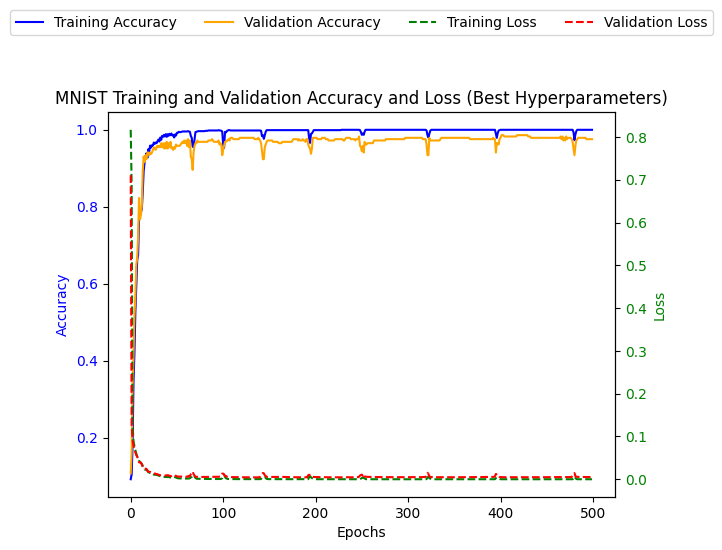

Best Learning Rate: 0.1
Best Decay Factor: 0.9


In [6]:
# Hyperparameters to search over
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
decay_factors = [0.9, 0.95, 0.99]

best_val_accuracy = 0  # Track the best validation accuracy
best_hyperparams = None  # Track the best combination of hyperparameters
best_results = None  # Track the best results for plotting

# Dictionary to store results
results_dict = {}

# Grid search over learning rate and decay factor
for lr in learning_rates:
    for decay_factor in decay_factors:
        # Initialize and train the MLP on MNIST
        mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=lr,
                        activation_function=ActivationFunction.SIGMOID, use_momentum=False, use_history=True, beta=decay_factor)
        mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=500)

        # Store results in dictionary
        results_dict[(lr, decay_factor)] = {
            'max_train_accuracy': max(mnist_training_accuracies),
            'max_val_accuracy': max(mnist_validation_accuracies),
            'min_train_loss': min(mnist_training_losses),
            'min_val_loss': min(mnist_validation_losses)
        }

        # Check if this combination has better validation accuracy
        if max(mnist_validation_accuracies) > best_val_accuracy:
            best_val_accuracy = max(mnist_validation_accuracies)
            best_hyperparams = (lr, decay_factor)
            best_results = (mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses)

# Print results for all combinations
for (lr, decay_factor), metrics in results_dict.items():
    print(f"Learning Rate: {lr}, Decay Factor: {decay_factor}")
    print(f"    Max Training Accuracy: {metrics['max_train_accuracy']:.4f}")
    print(f"    Max Validation Accuracy: {metrics['max_val_accuracy']:.4f}")
    print(f"    Min Training Loss: {metrics['min_train_loss']:.4f}")
    print(f"    Min Validation Loss: {metrics['min_val_loss']:.4f}")
    print("------------------------------------------------")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Extract the best results for plotting
best_train_acc, best_val_acc, best_train_loss, best_val_loss = best_results

# Plot training and validation accuracy from the best run
ax1.plot(best_train_acc, label='Training Accuracy', color='blue')
ax1.plot(best_val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(best_train_loss, label='Training Loss', linestyle='--', color='green')
ax2.plot(best_val_loss, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss (Best Hyperparameters)')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Display the optimal hyperparameters
print(f"Best Learning Rate: {best_hyperparams[0]}")
print(f"Best Decay Factor: {best_hyperparams[1]}")

# Train custom neural network on MNIST using tanh with tempered history

Learning Rate: 1e-06, Decay Factor: 0.9
    Max Training Accuracy: 0.0940
    Max Validation Accuracy: 0.1007
    Min Training Loss: 1.0678
    Min Validation Loss: 1.0456
------------------------------------------------
Learning Rate: 1e-06, Decay Factor: 0.95
    Max Training Accuracy: 0.1140
    Max Validation Accuracy: 0.0938
    Min Training Loss: 1.0578
    Min Validation Loss: 1.0398
------------------------------------------------
Learning Rate: 1e-06, Decay Factor: 0.99
    Max Training Accuracy: 0.1079
    Max Validation Accuracy: 0.1146
    Min Training Loss: 1.0623
    Min Validation Loss: 1.0370
------------------------------------------------
Learning Rate: 1e-05, Decay Factor: 0.9
    Max Training Accuracy: 0.1105
    Max Validation Accuracy: 0.0833
    Min Training Loss: 1.0591
    Min Validation Loss: 1.0398
------------------------------------------------
Learning Rate: 1e-05, Decay Factor: 0.95
    Max Training Accuracy: 0.0548
    Max Validation Accuracy: 0.0451
   

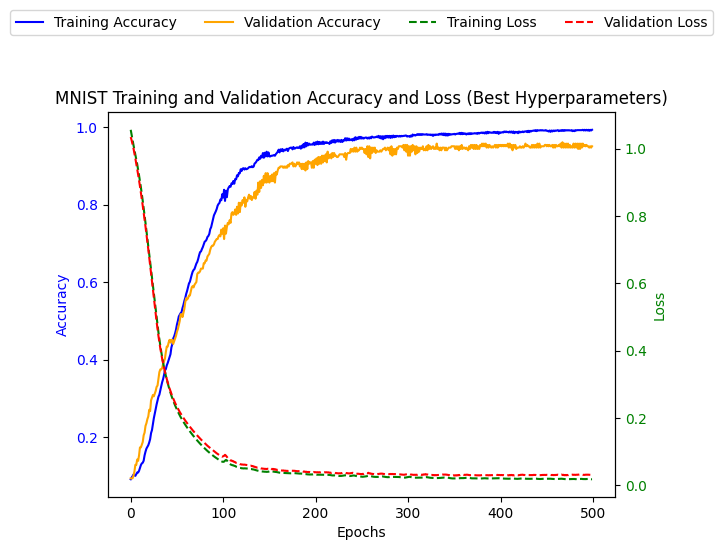

Best Learning Rate: 0.01
Best Decay Factor: 0.95


In [7]:
# Hyperparameters to search over
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
decay_factors = [0.9, 0.95, 0.99]

best_val_accuracy = 0  # Track the best validation accuracy
best_hyperparams = None  # Track the best combination of hyperparameters
best_results = None  # Track the best results for plotting

# Dictionary to store results
results_dict = {}

# Grid search over learning rate and decay factor
for lr in learning_rates:
    for decay_factor in decay_factors:
        # Initialize and train the MLP on MNIST
        mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=lr,
                        activation_function=ActivationFunction.TANH, use_momentum=False, use_history=True, beta=decay_factor)
        mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=500)

        # Store results in dictionary
        results_dict[(lr, decay_factor)] = {
            'max_train_accuracy': max(mnist_training_accuracies),
            'max_val_accuracy': max(mnist_validation_accuracies),
            'min_train_loss': min(mnist_training_losses),
            'min_val_loss': min(mnist_validation_losses)
        }

        # Check if this combination has better validation accuracy
        if max(mnist_validation_accuracies) > best_val_accuracy:
            best_val_accuracy = max(mnist_validation_accuracies)
            best_hyperparams = (lr, decay_factor)
            best_results = (mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses)

# Print results for all combinations
for (lr, decay_factor), metrics in results_dict.items():
    print(f"Learning Rate: {lr}, Decay Factor: {decay_factor}")
    print(f"    Max Training Accuracy: {metrics['max_train_accuracy']:.4f}")
    print(f"    Max Validation Accuracy: {metrics['max_val_accuracy']:.4f}")
    print(f"    Min Training Loss: {metrics['min_train_loss']:.4f}")
    print(f"    Min Validation Loss: {metrics['min_val_loss']:.4f}")
    print("------------------------------------------------")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Extract the best results for plotting
best_train_acc, best_val_acc, best_train_loss, best_val_loss = best_results

# Plot training and validation accuracy from the best run
ax1.plot(best_train_acc, label='Training Accuracy', color='blue')
ax1.plot(best_val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(best_train_loss, label='Training Loss', linestyle='--', color='green')
ax2.plot(best_val_loss, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss (Best Hyperparameters)')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Display the optimal hyperparameters
print(f"Best Learning Rate: {best_hyperparams[0]}")
print(f"Best Decay Factor: {best_hyperparams[1]}")